![](images/R.png)

# Data manipulation

In this section, we can practice to handle dataset with various ways.

## Read/Write

* Original file at [[read.write.md]] (170715 v3.1)

### R update to new version

* R update in R command

```r
## R session
install.packages("installr")
library(installr)
updateR()
```

### Install packages

* Install packages in Jupyter kernel (in Atom)

```r
# from CRAN
install.packages('multicompView', repos="http://cran.us.r-project.org")
# Bioconductor
source("https://bioconductor.org/biocLite.R"); biocLite("limma")
```

### Read from keyboard input

```r
a = readLines(con=file("stdin"))
```

### Read/Write file

```r
read.delim('filename.txt', header=TRUE) # Read txt file delimited by tab.
read.csv('filename.csv',header=TRUE) 	# Read csv file.

write.table(fdr,"fdr.csv",sep=",",row.names=TRUE) # save into your workspace
lapply(pca.AST,function(x)
       write.table(data.frame(x),"pca.AST.csv",append=T,sep=",")) # save list as csv file
```

### winProgressBar

* Updated at 2017

```r
## insert these code at head of function
time1=Sys.time(); n=length(iter)
pb=winProgressBar(title="Progress",label="description",min=0,max=n,width=500)
## insert these code at tail of function
for(i in 1:n) {
	## Progress time ##
	d=difftime(Sys.time(),time1,unit="sec")
	if(d<60) d=paste(round(d,2),"sec")
	else if(d>=60 && d<3600) d=paste(round(d/60,1),"min")
	else if(d>=3600) d=paste(round(d/3600,1),"hr")
	setWinProgressBar(pb,i,title=paste0(round(i/n*100,1)," % (",i,"/",n,") done for ",d))
	###################
}
print(difftime(Sys.time(),time1,units="auto")); close(pb)
```

## Affymetrix CEL file process

* Local CEL file process using "affy" package in Bioconductor

```r
source("https://bioconductor.org/biocLite.R")
biocLite("affy")

# Load packages and CEL files
library(affy)
setwd("C:/Users/KimSS-Work/Desktop/GSE60596_RAW")
c = ReadAffy()

image(c) # draw image plot
```

* Data normalization using RMA algorithm

```r
c_rma = rma(c) # RMA by rma
c_ex = expresso(c, bgcorrect.method="rma", # RMA by expresso
                normalize.method="quantiles",
                pmcorrect.method="pmonly",
                summary.method="medianpolish")

cl = log2(exprs(c)) # before normalization
ces = exprs(c_ex) # after normalization
```

* Visualization of the results

```r
# (1) boxplot
par(mfrow=c(1,2),
    mar=c(17,2,3,1)) # bottom, left, top, right
boxplot(cl,main="Before",ylim=c(0,15),las=2)
boxplot(ces,main="After",ylim=c(0,15),las=2)

# (2) MA plot
mva.pairs(cl[,1:3])
mva.pairs(ces[,1:3])
```

## Download data from GEO DB

* See GEOquery manual: http://bioconductor.org/packages/release/bioc/html/GEOquery.html
* Bioconductor version: Release (3.6)

In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("Biobase")
#biocLite("GEOquery")

* GSE60596: Data of mouse CR fat paper

![](images/GSE60596_study_design.png)

In [50]:
library(Biobase)
library(GEOquery)
gset <- getGEO("GSE60596",GSEMatrix=T,getGPL=F)[[1]]
show(gset)

https://ftp.ncbi.nlm.nih.gov/geo/series/GSE60nnn/GSE60596/matrix/
OK
Found 1 file(s)
GSE60596_series_matrix.txt.gz
Using locally cached version: C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpmuPYLi/GSE60596_series_matrix.txt.gz


ExpressionSet (storageMode: lockedEnvironment)
assayData: 28853 features, 12 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1483027 GSM1483028 ... GSM1483038 (12 total)
  varLabels: title geo_accession ... data_row_count (38 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: GPL6246 


1. Group names for all samples in a series
2. Orger samples by group

In [67]:
# 1. Group names
gsms <- "000333222111"
for (i in 1:nchar(gsms)) sml[i] <- substr(gsms,i,i)
sml <- paste("G", sml, sep="")  #set group names
print(sml)
# 2.Order by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
print(fl)
labels <- c("CD","CR85","CR70","CR55")

 [1] "G0" "G0" "G0" "G3" "G3" "G3" "G2" "G2" "G2" "G1" "G1" "G1"
 [1] G0 G0 G0 G1 G1 G1 G2 G2 G2 G3 G3 G3
Levels: G0 G1 G2 G3


* Set parameters for the boxplot

In [63]:
palette(c("#dfeaf4","#f4dfdf","#f2cb98","#dcdaa5", "#AABBCC"))
dev.new(width=4+dim(gset)[[2]]/5, height=6)
title <- paste ("GSE60596", '/', annotation(gset), " selected samples", sep ='')

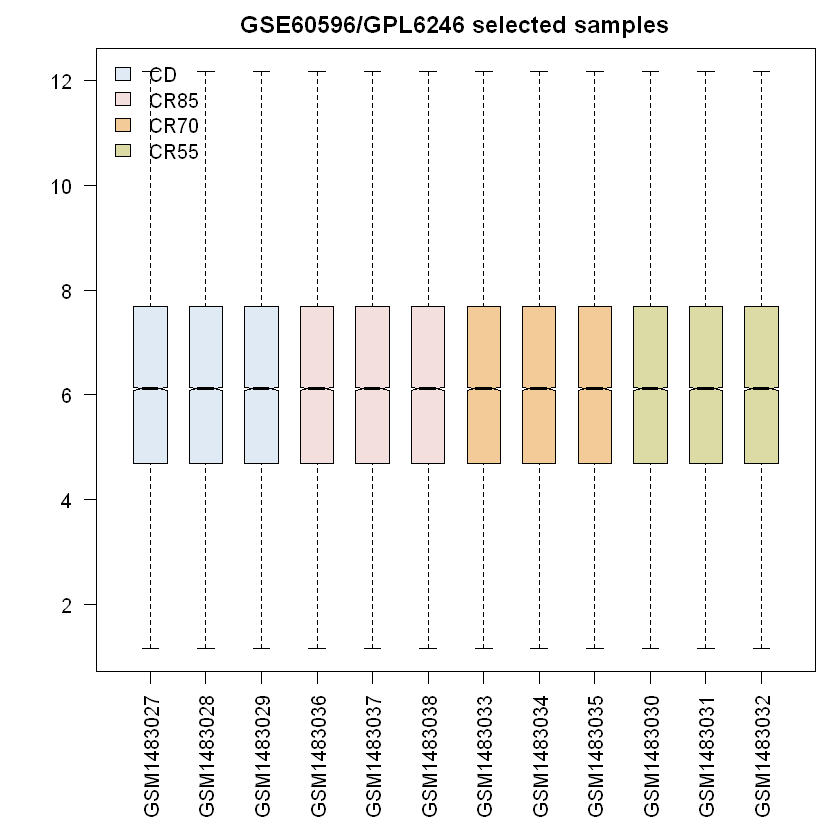

In [64]:
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1)) # to show long x-labels
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

## Data process of microarray

### 1. Group to colnames

In [70]:
g.ex = exprs(gset)
group = c(rep("CD",3),rep("CR85",3),rep("CR70",3),rep("CR55",3))
group = factor(group, levels=c("CD","CR85","CR70","CR55"))
head(g.ex)

,GSM1483027,GSM1483028,GSM1483029,GSM1483030,GSM1483031,GSM1483032,GSM1483033,GSM1483034,GSM1483035,GSM1483036,GSM1483037,GSM1483038
10344614,6.29828,6.45706,7.00539,6.73219,6.61064,6.86500,6.53692,6.66043,6.67828,6.79505,6.68073,7.14738
10344616,1.56846,1.72555,1.78222,1.72607,1.61721,1.50168,1.64366,1.58296,1.72683,1.66227,1.66654,1.62195
10344618,1.75445,1.81673,1.79576,1.66881,1.87402,1.62195,1.97154,1.62549,1.71369,1.55258,1.56346,1.70583
10344620,3.77727,3.77727,3.74415,3.87720,3.78526,3.95883,3.69814,3.72268,3.44231,3.65586,3.89536,3.63265
10344622,6.59422,6.86125,6.75612,7.23078,6.63278,6.46169,7.62461,7.62339,7.17349,7.81457,7.59132,7.66592
10344624,9.84842,9.95930,9.72447,9.71399,10.11970,9.86267,10.13760,10.13370,9.91964,10.22380,9.60713,9.71457


### 2. Calculate ANOVA p-value & FDR

In [76]:
library(tictoc)
tic("ANOVA p-val calculation")
pval = apply(g.ex, 1, function(row) {
  fit = lm(row~group)
  anovaP = anova(fit)$'Pr(>F)'[1]
})
toc()
tic("FDR calculation")
pval.adj = p.adjust(pval,"BH") # adjust by FDR
toc()

ANOVA p-val calculation: 55.6 sec elapsed
FDR calculation: 0 sec elapsed


In [82]:
print(paste("p-val len=",length(pval)))
print(paste("fdr   len=",length(pval.adj)))

[1] "p-val len= 28853"
[1] "fdr   len= 28853"


### 3. Visualize the p-value & FDR

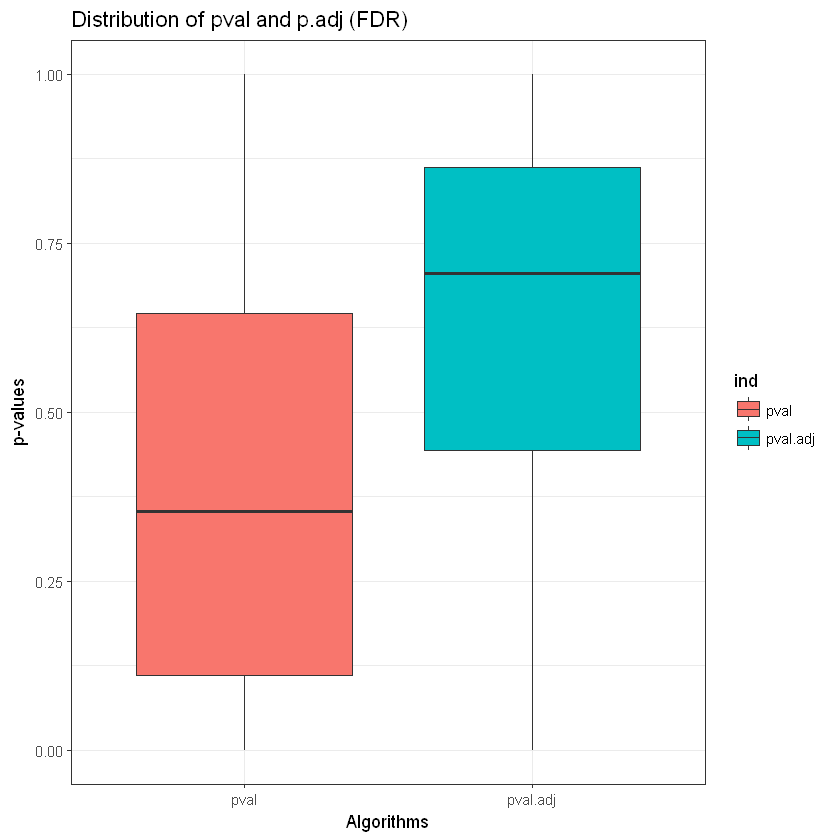

In [78]:
library(ggplot2)
p.df = stack(data.frame(pval,pval.adj))
ggplot(p.df,aes(x=ind,y=values))+theme_bw()+
  geom_boxplot(aes(fill=ind))+
  labs(title="Distribution of pval and p.adj (FDR)",
       x="Algorithms", y="p-values")

### 4. Calculate fold change values

In [89]:
tic("average signal by groups")
g.av = NULL
for(i in levels(group)) {
  a.av = apply(g.ex[,which(group==i)],1,mean)
  g.av = cbind(g.av,a.av)
}
colnames(g.av) = levels(group)
toc()
head(g.av)

average signal by groups: 1.59 sec elapsed


,CD,CR85,CR70,CR55
10344614,6.586910,6.735943,6.625210,6.874387
10344616,1.692077,1.614987,1.651150,1.650253
10344618,1.788980,1.721593,1.770240,1.607290
10344620,3.766230,3.873763,3.621043,3.727957
10344622,6.737197,6.775083,7.473830,7.690603
10344624,9.844063,9.898787,10.063647,9.848500


In [174]:
tic("calculate fold change")
g.fc = NULL
for(i in 1:length(colnames(g.av)[-1])) {
  a.fc.log = g.av[,i+1]-g.av[,1] # log2 form
  a.fc = sapply(a.fc.log, function(x) ifelse(x>0,2^x,-(2^(-x))))
  g.fc = cbind(g.fc, a.fc)
}
colnames(g.fc) = paste(levels(group)[-1],levels(group)[1],sep="/")
toc()
head(cbind(g.fc,pval.adj))

calculate fold change: 0.39 sec elapsed


,CR85/CD,CR70/CD,CR55/CD,pval.adj
10344614,1.108826,1.026903,1.220504,0.78149931
10344616,-1.054888,-1.028774,-1.029414,0.91034359
10344618,-1.047817,-1.013074,-1.134212,0.68383792
10344620,1.077385,-1.105874,-1.026884,0.48705134
10344622,1.026609,1.666283,1.936440,0.08942918
10344624,1.038660,1.164397,1.003080,0.83059136


### 5. Filter differentially expressed genes

* Statistical criteria by FDR <0.05 & |FC| >1.5

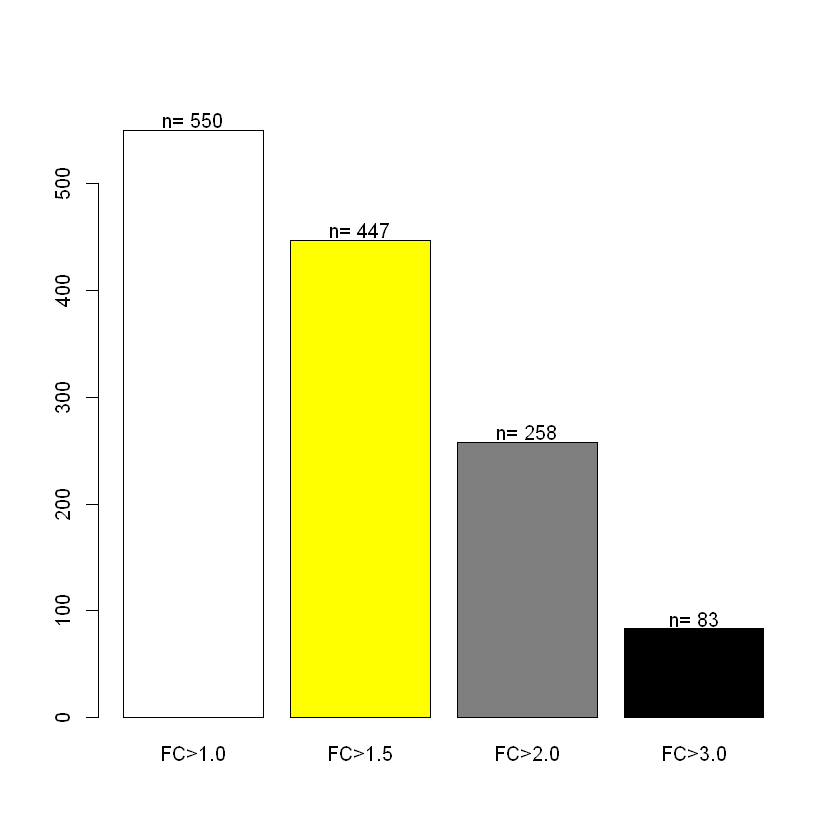

In [179]:
g.fc.max = apply(abs(g.fc),1,max)
id_deg = list(which(pval.adj<0.05 & g.fc.max>1.0),
              which(pval.adj<0.05 & g.fc.max>1.5), #<- Selected criteria
              which(pval.adj<0.05 & g.fc.max>2.0),
              which(pval.adj<0.05 & g.fc.max>3.0))
id_deg_size = NULL
for(i in 1:length(id_deg)) id_deg_size = c(id_deg_size,length(id_deg[[i]]))
names(id_deg_size) = paste0("FC>",c("1.0","1.5","2.0","3.0"))

barp = barplot(id_deg_size, col=c("white","yellow","gray50","black"),ylim=c(0,580))
text(barp,id_deg_size+10,paste("n=",id_deg_size),cex=1)

### 6. Correlation histogram

  10345869   10346164   10346564   10347915   10349724   10350003 
-0.9285330 -0.8898520 -0.9408459 -0.8543054 -0.9352794 -0.8990574 


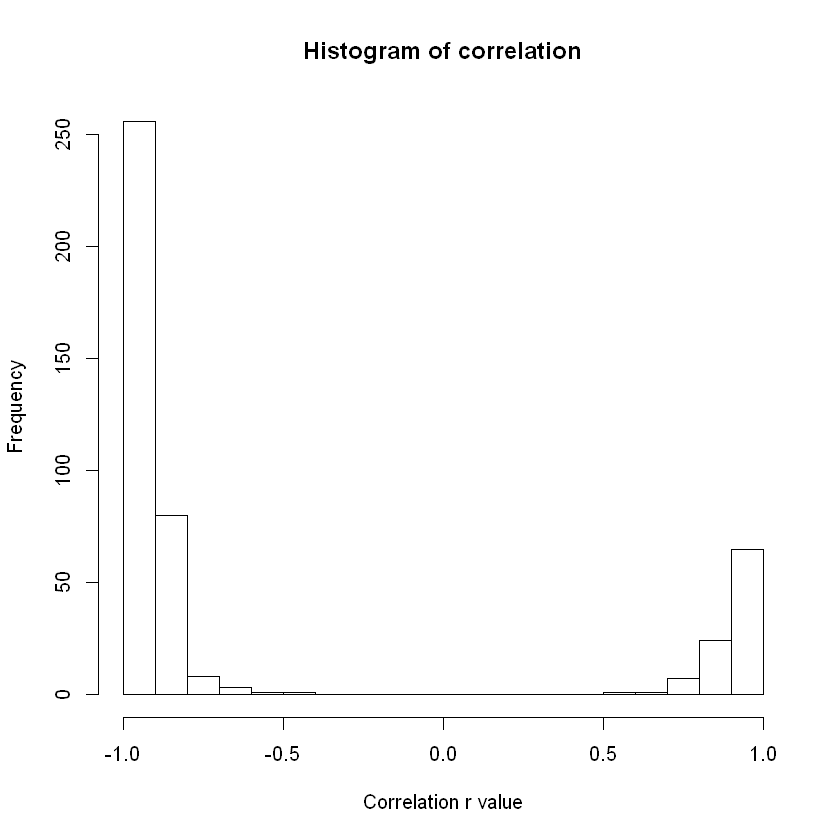

In [180]:
cr = c(rep(0,3),rep(15,3),rep(30,3),rep(45,3))
g.deg = g.ex[id_deg[[2]],] # filter signals of DEGs
g.corr = apply(g.deg,1,function(row) a.corr = cor(cr, row))
print(head(g.corr))
hist(g.corr, breaks=seq(-1,1,by=0.1), 
     main="Histogram of correlation", xlab="Correlation r value")

### 7. SOM clustering

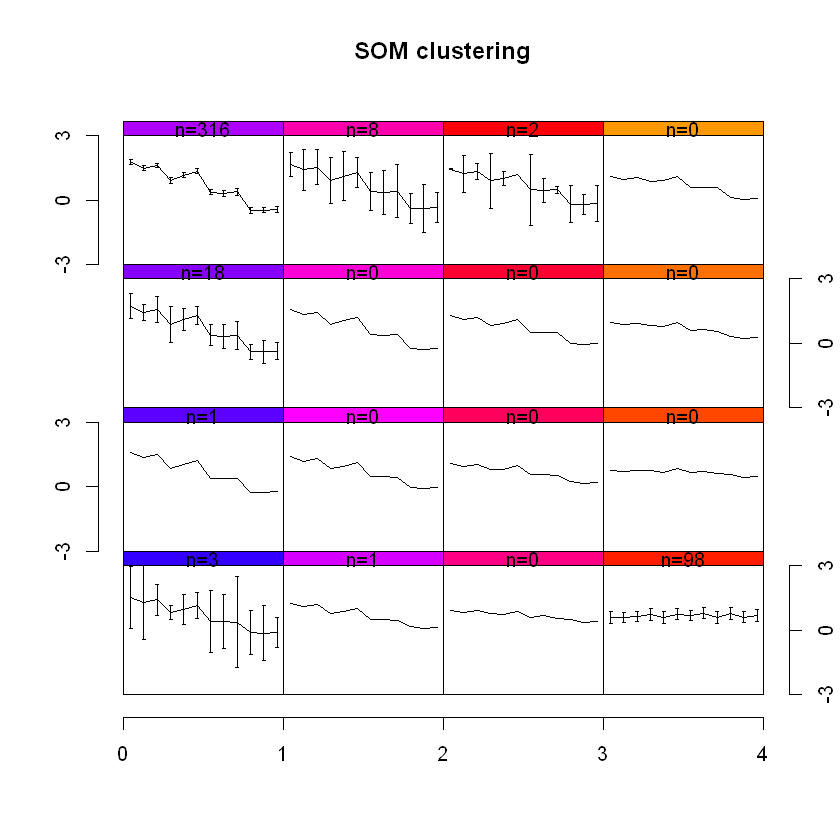

In [181]:
library(som)
g.deg.s = t(scale(t(g.deg)))
g.som = som(g.deg.s, xdim=4,ydim=4, topol="rect", neigh="gaussian")

plot(g.som, main="SOM clustering")

* box plot of a cluster

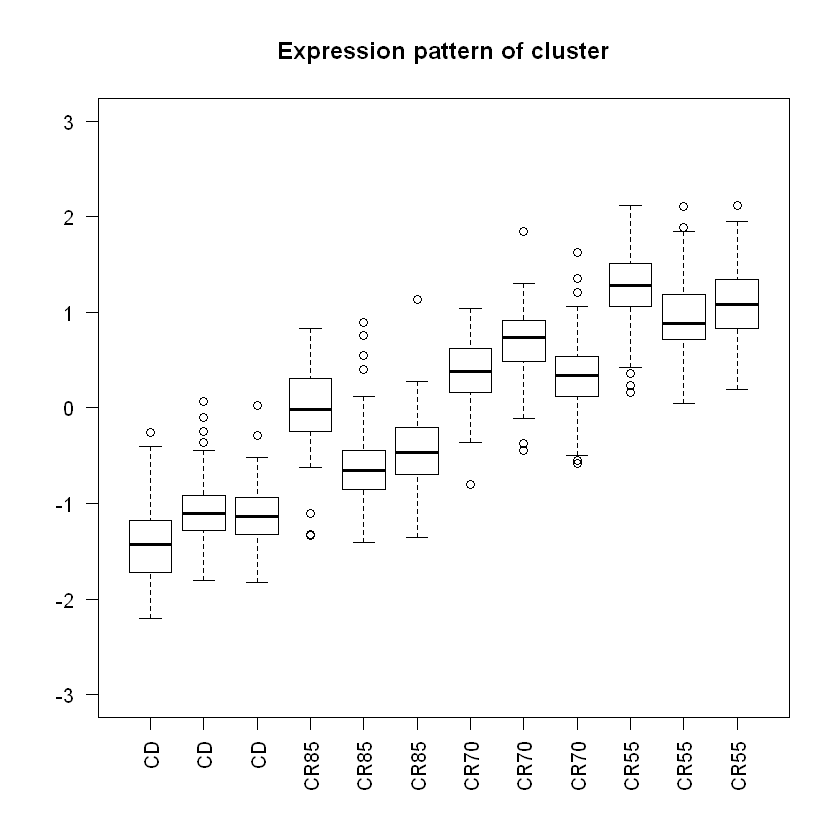

In [186]:
id_x = which(g.som$visual$x==3)
id_y = which(g.som$visual$y==0)
id_xy = intersect(id_x,id_y)
clst = g.deg.s[id_xy,]
colnames(clst) = c(rep("CD",3),rep("CR85",3),rep("CR70",3),rep("CR55",3))
boxplot(clst, ylim=c(-3,3), las=2, main=paste0("Expression pattern of cluster"))

### 8. Export results as csv file

In [190]:
p.adj.deg = pval.adj[id_deg[[2]]]
g.fc.deg = g.fc[id_deg[[2]]]
g.som.xy = data.frame(g.som$visual$x, g.som$visual$y)

out = cbind(g.deg, p.adj.deg, g.fc.deg, g.corr, g.som.xy)
head(out)
#write.csv(out, "analysis.csv")

,GSM1483027,GSM1483028,GSM1483029,GSM1483030,GSM1483031,GSM1483032,GSM1483033,GSM1483034,GSM1483035,GSM1483036,GSM1483037,GSM1483038,p.adj.deg,g.fc.deg,g.corr,g.som.visual.x,g.som.visual.y
10345869,11.52170,11.51370,11.46480,11.43850,11.52470,11.34540,11.14330,11.26410,11.00900,10.99940,10.82290,10.81690,0.02543059,-1.045263,-0.9285330,0,3
10346164,10.72960,10.67810,10.87450,10.56830,10.64940,10.76170,10.23750,10.62760,10.48220,9.99498,9.92298,10.17240,0.04697059,-1.072467,-0.8898520,0,3
10346564,9.02001,9.12466,8.90009,8.76900,8.97380,8.79245,8.74924,8.54441,8.49560,8.13174,8.25174,8.30694,0.02564268,-1.124931,-0.9408459,0,3
10347915,6.87597,6.34713,6.43746,5.83392,5.89777,5.91611,4.85565,5.53789,4.40175,4.91589,5.17006,5.11862,0.04977909,-1.592088,-0.8543054,0,2
10349724,7.80890,7.63765,7.83386,7.10431,7.36179,7.53575,7.10471,7.15266,7.00408,6.77485,6.94244,6.53126,0.03692155,-1.343677,-0.9352794,0,3
10350003,8.31725,8.28942,8.32429,8.05015,8.19442,8.39471,8.06220,8.09464,7.97296,7.72558,7.58678,7.81600,0.04407085,-1.069715,-0.8990574,0,3


## ss.gene.selec function

* This function is working for DEG selection based on FC & FDR values
* Ver 1.4  - 170907, add fc criteria option

In [246]:
ss.gene.selec = function(data.fc, fc=c(2,3), data.pval, pval=c(0.01,0.05,0.1), uniononly=F,test=NULL) {
  n= length(fc); m= ncol(data.fc); l= length(pval)
  result=NULL; uninum=NULL
  for(i in 1:n) { # iteration for fc
    fc.result=NULL; fdr.id=NULL
    for(j in 1:m) {
      fdr=NULL; col = NULL
      for(k in 1:l) {
        if(test=="anova") {
          if(k==1) { fdr[[k]] = list(NULL) }
          fdr[[k]] = which(data.pval<=pval[k] & abs(data.fc[,j])>fc[i])
        } else if(test=="ttest") {
          fdr[[k]] = which(data.pval[,j]<=pval[k] & abs(data.fc[,j])>fc[i])
        } else { stop("please input --> test='anova' or 'ttest'"); }
        col = c(col,length(fdr[[k]]))
        if(j==1) { fdr.id[k]=list(NULL) }
        fdr.id[[k]] = union(fdr.id[[k]],fdr[[k]])
      }
      fc.result = cbind(fc.result,col)
    }
    uni = NULL
    for(k in 1:l) uni = c(uni,length(fdr.id[[k]]))
    if(uniononly==F) {
      result = rbind(result,fc.result)
      uninum = c(uninum,uni)
    } else if(uniononly==T) { result = cbind(result,uni) }
  }
  if(uniononly==F) {
    result = cbind(result,uninum)
    colnames(result) = c(colnames(data.fc),"Union")

    thrsh_fc = c(paste0("FC",fc))
    thrsh_pval = c(paste(names(data.pval)[1],pval))
    thrsh = as.vector(outer(thrsh_pval,thrsh_fc,paste,sep=" & "))
    rownames(result) = thrsh
  } else if(uniononly==T) {
    colnames(result) = c(paste0('FC',fc))
    rownames(result) = paste0(names(data.pval)[1],pval)
  }
  #write.csv(result,"ss.gene.selec_result.csv")
  #print("Result saved as 'ss.gene.selec_result.csv'.")
  return(result)
}

In [242]:
print(dim(g.fc))
print(length(pval.adj))
names(pval.adj) = "FDR"

[1] 28853     3
[1] 28853


In [268]:
fc_thrsh = c(0,1.5,2,3,5)
pval_thrsh = c(0.01,0.05,0.1)
out = ss.gene.selec(data.fc=g.fc, fc=fc_thrsh,
                    data.pval=pval.adj, pval=pval_thrsh,
                    uniononly=F, test='anova') # test='anova' or 'ttest'
out = data.frame(out[order(rownames(out)),])
out

,CR85.CD,CR70.CD,CR55.CD,Union
FDR 0.01 & FC0,24,24,24,24
FDR 0.01 & FC1.5,4,15,21,21
FDR 0.01 & FC2,0,5,15,15
FDR 0.01 & FC3,0,2,9,9
FDR 0.01 & FC5,0,1,4,4
FDR 0.05 & FC0,550,550,550,550
FDR 0.05 & FC1.5,75,290,441,447
FDR 0.05 & FC2,15,103,254,258
FDR 0.05 & FC3,1,32,81,83
FDR 0.05 & FC5,0,7,26,26


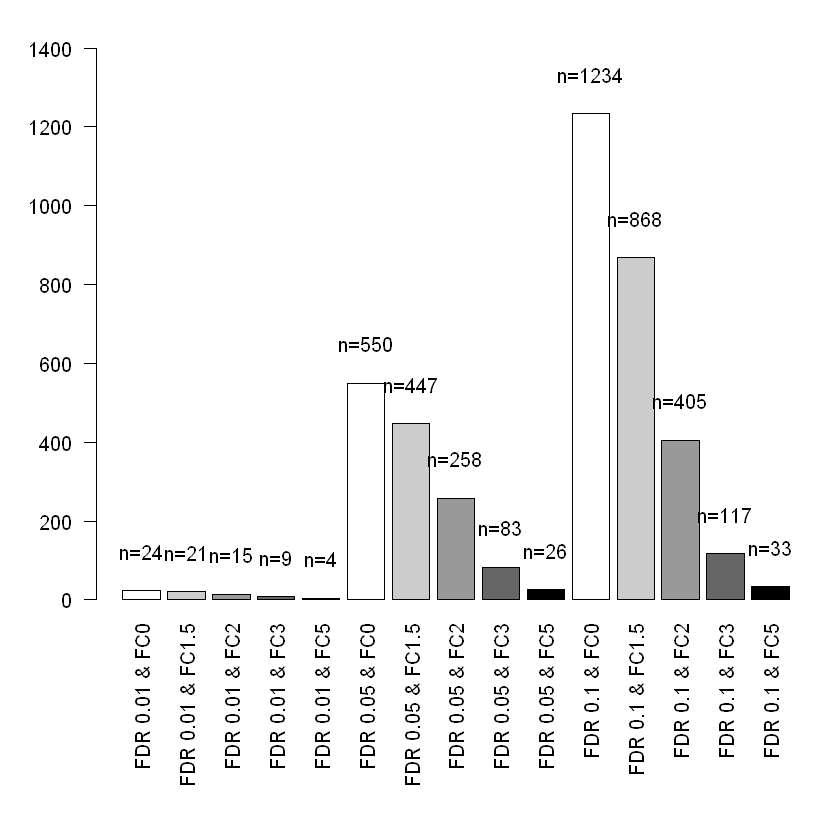

In [274]:
par(mar=c(2+round(max(nchar(rownames(out)))/2),4,2,1)) # to show long x-labels
barp2 = barplot(out$Union, names.arg=rownames(out), ylim=c(0,1400), las=2,
                col=rep(c("white","gray80","gray60","gray40","black"),3))
text(barp2,out$Union+100,paste0("n=",out$Union),cex=1)

In [1]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 16299)

Matrix products: default

locale:
[1] LC_COLLATE=Korean_Korea.949  LC_CTYPE=Korean_Korea.949   
[3] LC_MONETARY=Korean_Korea.949 LC_NUMERIC=C                
[5] LC_TIME=Korean_Korea.949    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.3      R6_2.2.2            magrittr_1.5       
 [4] IRdisplay_0.4.4     pbdZMQ_0.2-6        tools_3.4.3        
 [7] crayon_1.3.4        uuid_0.1-2          stringi_1.1.6      
[10] IRkernel_0.8.8.9000 jsonlite_1.5        stringr_1.2.0      
[13] digest_0.6.13       repr_0.12.0         evaluate_0.10.1    